In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sagemaker
import boto3
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) # To display all columns
pd.set_option('display.max_rows',None) # To display all columns
client = boto3.client('s3')
import feather
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from functools import reduce
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
df=pd.read_feather('Dataframe80.ftr')
dfu = pd.read_feather('s3://haseebdata/Dataset/Users.ftr')
dfq = pd.read_feather('s3://haseebdata/Dataset/dfq.ftr')
Repeat=pd.read_feather('RepeatedQuestion.ftr')

In [52]:
Maindf= pd.read_feather('FinalData.ftr')

In [3]:
df['user_iD'].nunique()

27884

In [4]:
df.head()

,user_iD,question_id,user_answer,correct_answer,correct,elapsed_time,solving_id,explanation_id,bundle_id,timestamp,deployed_at
0,50,3654,d,d,1.0,47.0,1,2186,2186,1540815498477,2019-09-17 02:49:05.091
1,50,898,c,c,1.0,17.0,2,898,898,1540815563576,2017-12-29 15:34:47.831
2,50,3633,c,b,0.0,53.0,3,2165,2165,1540815619061,2019-05-17 12:10:59.583
3,50,5805,a,d,0.0,41.0,4,4337,4337,1540815663799,2018-02-20 05:45:24.616
4,50,5680,d,c,0.0,25.0,5,4212,4212,1540815691595,2019-09-16 12:05:05.072


In [54]:
Maindf['bundle_id'].nunique()

8939

In [48]:
df[0:50]

,user_iD,question_id,user_answer,correct_answer,correct,elapsed_time,solving_id,explanation_id,bundle_id,timestamp,deployed_at,new
0,50,3654,d,d,1.0,47.0,1,2186,2186,1540815498477,2019-09-17 02:49:05.091,True
1,50,898,c,c,1.0,17.0,2,898,898,1540815563576,2017-12-29 15:34:47.831,True
2,50,3633,c,b,0.0,53.0,3,2165,2165,1540815619061,2019-05-17 12:10:59.583,False
3,50,5805,a,d,0.0,41.0,4,4337,4337,1540815663799,2018-02-20 05:45:24.616,False
4,50,5680,d,c,0.0,25.0,5,4212,4212,1540815691595,2019-09-16 12:05:05.072,False
5,50,6056,d,b,0.0,54.0,6,4588,4588,1540815748022,2019-09-16 12:11:59.700,False
6,50,4131,d,c,0.0,39.0,7,2663,2663,1540815790548,2019-09-17 02:35:35.370,False
7,50,4516,a,c,0.0,34.0,8,3048,3048,1540815953577,2019-08-09 07:51:38.526,False
8,50,3935,b,a,0.0,11.0,9,2467,2467,1540815999347,2018-05-18 09:34:39.176,False
9,50,6041,a,a,1.0,12.0,10,4573,4573,1540816033743,2019-09-16 12:11:13.985,True


In [11]:
df['elapsed_time'] = df['elapsed_time'] * 1000
df.head()

,user_iD,question_id,user_answer,correct_answer,correct,elapsed_time,solving_id,explanation_id,bundle_id,timestamp,deployed_at
0,50,3654,d,d,1.0,47000.0,1,2186,2186,1540815498477,2019-09-17 02:49:05.091
1,50,898,c,c,1.0,17000.0,2,898,898,1540815563576,2017-12-29 15:34:47.831
2,50,3633,c,b,0.0,53000.0,3,2165,2165,1540815619061,2019-05-17 12:10:59.583
3,50,5805,a,d,0.0,41000.0,4,4337,4337,1540815663799,2018-02-20 05:45:24.616
4,50,5680,d,c,0.0,25000.0,5,4212,4212,1540815691595,2019-09-16 12:05:05.072


In [15]:
df_total_questions_attempted = df.groupby(['user_iD'], as_index=False , sort=False)['question_id'].count()

df_total_questions_attempted = df_total_questions_attempted.rename(columns={'question_id': 'Total Questions Attempted'})                                                               

In [16]:
df_correct = df[df['correct']==1].groupby(['user_iD'], as_index=False, sort=False)['question_id'].count()

df_correct = df_correct.rename(columns={'question_id': 'Corrected'})

In [17]:
df_incorrect = df[df['correct']==0].groupby(['user_iD'], as_index=False, sort=False)['question_id'].count()

df_incorrect = df_incorrect.rename(columns={'question_id': 'Incorrected'})

In [18]:
dfs = [df_total_questions_attempted, df_correct, df_incorrect]
df_final = reduce(lambda left,right: pd.merge(left,right,on='user_iD'), dfs)

In [19]:
df_final['Percentage'] = (df_final['Corrected'] / df_final['Total Questions Attempted']) *100
df_final.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage
0,50,8779,7310,1469,83.266887
1,58,7216,6568,648,91.019956
2,98,7032,5965,1067,84.826507
3,99,48,39,9,81.250000
4,103,7,6,1,85.714286


In [20]:
df['elapsed_time']= df.elapsed_time.div(1000)   #DIVDING THE ELAPSED TIME by 1000 to further check the mean elapsed time by each user
Elapsed_time= df.groupby('user_iD' , sort=False)['elapsed_time'].median()

In [21]:
df_final['user_iD'].nunique()

27884

In [22]:
dfs = [df_final, Elapsed_time]
df2 = reduce(lambda left,right: pd.merge(left,right,on='user_iD'), dfs)

In [23]:
df2.head()

,user_iD,Total Questions Attempted,Corrected,Incorrected,Percentage,elapsed_time
0,50,8779,7310,1469,83.266887,24.000
1,58,7216,6568,648,91.019956,36.000
2,98,7032,5965,1067,84.826507,29.667
3,99,48,39,9,81.250000,18.000
4,103,7,6,1,85.714286,22.000


In [32]:
df['new'] = df['correct'].eq(1) & ~df.duplicated(['user_iD','question_id','correct'])
df[0:10]

,user_iD,question_id,user_answer,correct_answer,correct,elapsed_time,solving_id,explanation_id,bundle_id,timestamp,deployed_at,new
0,50,3654,d,d,1.0,47.0,1,2186,2186,1540815498477,2019-09-17 02:49:05.091,True
1,50,898,c,c,1.0,17.0,2,898,898,1540815563576,2017-12-29 15:34:47.831,True
2,50,3633,c,b,0.0,53.0,3,2165,2165,1540815619061,2019-05-17 12:10:59.583,False
3,50,5805,a,d,0.0,41.0,4,4337,4337,1540815663799,2018-02-20 05:45:24.616,False
4,50,5680,d,c,0.0,25.0,5,4212,4212,1540815691595,2019-09-16 12:05:05.072,False
5,50,6056,d,b,0.0,54.0,6,4588,4588,1540815748022,2019-09-16 12:11:59.700,False
6,50,4131,d,c,0.0,39.0,7,2663,2663,1540815790548,2019-09-17 02:35:35.370,False
7,50,4516,a,c,0.0,34.0,8,3048,3048,1540815953577,2019-08-09 07:51:38.526,False
8,50,3935,b,a,0.0,11.0,9,2467,2467,1540815999347,2018-05-18 09:34:39.176,False
9,50,6041,a,a,1.0,12.0,10,4573,4573,1540816033743,2019-09-16 12:11:13.985,True


In [33]:
df1 = (df.groupby(['user_iD'])
        .agg(**{'Questions Attempted':('question_id','nunique'),
                'Unique Questions Attempted':('new','sum')})
        .reset_index())

df1.head()

,user_iD,Questions Attempted,Unique Questions Attempted
0,50,4576,4570
1,58,5608,5191
2,98,5399,4731
3,99,48,39
4,103,7,6


In [ ]:
df_correct = dfm[dfm['correct']==1].groupby(['user_iD'], as_index=False, sort=False)['question_id'].count()

df_correct = df_correct.rename(columns={'question_id': 'Corrected'})

In [38]:
no_uniq_q = dfq['question_id'].nunique()
df1['PercentageTotalQuestion'] = df1['Unique Questions Attempted'].div(no_uniq_q).mul(100)
df1['PercentageQuestionAttempt'] = df1['Unique Questions Attempted'].div(df1['Questions Attempted']).mul(100)

,user_iD,Questions Attempted,Unique Questions Attempted,Percentage,PercentageTotalQuestion,PercentageQuestionAttempt
0,50,4576,4570,34.702711,34.702711,99.868881
1,58,5608,5191,39.418331,39.418331,92.564194
2,98,5399,4731,35.925279,35.925279,87.627338
3,99,48,39,0.296150,0.296150,81.250000
4,103,7,6,0.045562,0.045562,85.714286


In [68]:
df1['Percen'] = (df1['Unique Questions Attempted']/13169) * 100
df1.head()

,user_iD,Questions Attempted,Unique Questions Attempted,PercentageTotalQuestion,PercentageQuestionAttempt,Percen
0,50,4576,4570,34.702711,99.868881,34.702711
1,58,5608,5191,39.418331,92.564194,39.418331
2,98,5399,4731,35.925279,87.627338,35.925279
3,99,48,39,0.296150,81.250000,0.296150
4,103,7,6,0.045562,85.714286,0.045562


array([[<AxesSubplot:title={'center':'Percen'}>]], dtype=object)

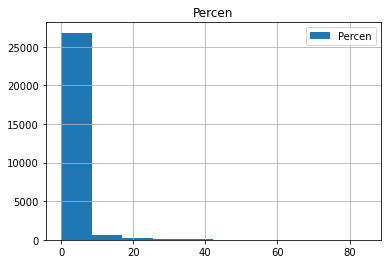

In [69]:
df1.hist(column='Percen', bins=10,legend=True)

In [66]:
df1['PercentageTotalQuestion'].describe()

count    27884.000000
mean         1.198518
std          4.941225
min          0.015187
25%          0.037968
50%          0.060749
75%          0.205027
max         84.478700
Name: PercentageTotalQuestion, dtype: float64

# DF1 COLUMNS REPRESENTS

### Questions Attempted : How many questions user has attempted including repeated

### UNIQUE Questions Attempt : How many unique questions user has attempted

### PERCENTAGE Total Question : Unique Questions Attempted /  # of Total Questions i.e 13169 ==>  (4570/13169)*100 = 34.7

### PERCENTAGE Questions Attempt : Unique Questions Attempted /  # of TOTAL QUESTIONS Attempted  ==>  (4570/4576)*100 = 99.8

In [40]:
df1.head()

,user_iD,Questions Attempted,Unique Questions Attempted,PercentageTotalQuestion,PercentageQuestionAttempt
0,50,4576,4570,34.702711,99.868881
1,58,5608,5191,39.418331,92.564194
2,98,5399,4731,35.925279,87.627338
3,99,48,39,0.296150,81.250000
4,103,7,6,0.045562,85.714286


In [41]:
df1['Unique Questions Attempted'].describe()

count    27884.000000
mean       157.832807
std        650.709964
min          2.000000
25%          5.000000
50%          8.000000
75%         27.000000
max      11125.000000
Name: Unique Questions Attempted, dtype: float64

## TOP USER

In [42]:
A = df1.loc[df1['Unique Questions Attempted']== 11125]
A

,user_iD,Questions Attempted,Unique Questions Attempted,PercentageTotalQuestion,PercentageQuestionAttempt
17,373,11342,11125,84.4787,98.086757


## USERS ATTEMPTED MORE THAN 7000 UNIQUE QUESTIONS

In [44]:
B = df1.loc[df1['Unique Questions Attempted'] >= 7000]
B.head()

,user_iD,Questions Attempted,Unique Questions Attempted,PercentageTotalQuestion,PercentageQuestionAttempt
17,373,11342,11125,84.478700,98.086757
43,753,8654,7640,58.015035,88.282875
51,929,8961,8298,63.011618,92.601272
63,1273,10355,8912,67.674083,86.064703
76,1497,8810,8013,60.847445,90.953462


In [70]:
Z= df1.loc[df1['Unique Questions Attempted'] >= 5000]
len(Z)

123

In [45]:
len(B)

49

In [46]:
C = df1.loc[df1['Unique Questions Attempted'] >= 9000]
len(C)

10

In [47]:
C[0:9]

,user_iD,Questions Attempted,Unique Questions Attempted,PercentageTotalQuestion,PercentageQuestionAttempt
17,373,11342,11125,84.478700,98.086757
159,3518,9946,9475,71.949275,95.264428
325,7403,9702,9079,68.942213,93.578644
430,10203,10352,10350,78.593667,99.980680
712,19647,10461,10171,77.234414,97.227798
2304,45335,10354,9292,70.559648,89.743094
2519,57249,9875,9280,70.468525,93.974684
4155,152518,10490,10092,76.634520,96.205910
5971,210492,10970,10935,83.035918,99.680948


## REMOVING DUPLICATES

In [57]:
dup = df[0:1000]

In [58]:
dup.head()

,user_iD,question_id,user_answer,correct_answer,correct,elapsed_time,solving_id,explanation_id,bundle_id,timestamp,deployed_at,new
0,50,3654,d,d,1.0,47.0,1,2186,2186,1540815498477,2019-09-17 02:49:05.091,True
1,50,898,c,c,1.0,17.0,2,898,898,1540815563576,2017-12-29 15:34:47.831,True
2,50,3633,c,b,0.0,53.0,3,2165,2165,1540815619061,2019-05-17 12:10:59.583,False
3,50,5805,a,d,0.0,41.0,4,4337,4337,1540815663799,2018-02-20 05:45:24.616,False
4,50,5680,d,c,0.0,25.0,5,4212,4212,1540815691595,2019-09-16 12:05:05.072,False


In [51]:
duplicates = duplicates['correct'].eq(1) & ~duplicates.drop_duplicates(['user_iD','question_id','correct'])

AttributeError: 'DataFrame' object has no attribute 'drop_duplicated'

In [56]:
out = duplicates[duplicates['correct']==1].drop_duplicates('correct answer')
out.head()

KeyError: Index(['correct answer'], dtype='object')

In [59]:
D= dup[dup['correct'].eq(1.0)].groupby(dup['user_iD']).agg('last')

In [60]:
D[0:50]

,user_iD,question_id,user_answer,correct_answer,correct,elapsed_time,solving_id,explanation_id,bundle_id,timestamp,deployed_at,new
user_iD,,,,,,,,,,,,
50,50,5697,b,b,1.0,18.0,994,4229,4229,1557834645446,2019-07-12 00:17:07.566,False


In [64]:
out = dup([dup['correct']==1].drop_duplicates('correct answer'))

AttributeError: 'list' object has no attribute 'drop_duplicates'

In [ ]:
df['correct'].eq(1) & ~df.drop_duplicated(['user_iD','question_id','correct'])
mask = df['correct'].eq(1) & ~df.duplicated(['user_iD','question_id','correct'])
out = df[mask]
out = df([df['correct']==1].drop_duplicates('correct answer'))